In [30]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import pickle

In [14]:
data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\\test_train_split_after_outlier\train.csv')
data

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,snow_on_ground,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,21.7,3.3,28.0,25.9,360,1020.40,16.1,0.00,8,0.0,...,52.9,426.5,80.8,26.9,53.8,31.5,United States,37.262524,-98.546196,472.1
1,0.1,-0.1,98.0,6.2,104,1015.97,25.3,0.00,4,0.0,...,37.6,646.4,65.7,1.5,5.6,0.6,Canada,49.550000,-111.050000,845.0
2,1.7,-8.3,47.8,24.1,330,1029.50,16.1,1.54,0,0.0,...,4.5,318.3,8.8,2.3,2.0,0.1,United States,39.771942,-94.909706,251.9
3,31.0,2.0,15.6,14.8,320,1019.60,16.1,0.00,18,0.0,...,146.5,688.1,191.2,21.3,62.2,40.7,United States,43.564360,-116.222860,875.3
4,24.0,7.4,36.0,5.6,271,1021.50,14.5,1.30,0,0.0,...,48.5,289.5,68.3,3.4,11.7,2.1,Canada,53.030000,-122.510000,545.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759584,25.4,16.0,55.0,10.6,231,1010.67,24.7,2.51,0,0.0,...,10.1,207.8,18.0,1.6,2.2,0.1,Canada,45.840000,-75.650000,194.6
759585,19.4,9.4,52.6,3.7,110,1012.30,42.2,0.70,0,0.0,...,12.5,45.2,14.8,2.2,2.8,0.2,Canada,47.320000,-71.150000,672.8
759586,16.4,7.5,55.0,14.0,223,1003.80,25.0,0.00,4,0.0,...,32.9,116.6,38.5,6.4,14.0,2.9,Canada,64.050000,-139.133330,370.0
759587,21.4,7.9,43.1,14.2,318,1010.63,21.4,0.40,0,0.0,...,85.1,444.3,115.1,9.8,33.1,13.3,Canada,53.340000,-110.880000,623.0


In [5]:
data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'wind_direction', 'atmospheric_pressure', 'visibility',
       'precipitation', 'rain_days', 'snow_on_ground',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index',
       'daily_severity_rating', 'country', 'latitude', 'longitude',
       'elevation'],
      dtype='object')

In [24]:
train_data = data[['temperature', 'dew_point_temperature', 'relative_humidity',
       'wind_speed', 'wind_direction', 'atmospheric_pressure',
       'precipitation', 'rain_days',
       'fine_fuel_moisture_code', 'duff_moisture_code', 'drought_code',
       'build_up_index', 'initial_spread_index', 'fire_weather_index','country']]

# Load saved OneHotEncoding
with open(r'E:\Info_Srping\FWI_Prediction\models\Pkl_files_after_outlier_remover\one_hot_encoder.pkl', 'rb') as f:
    ohe = pickle.load(f)

encoded_array = ohe.transform(train_data[['country']])  
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['country']))
new_data_encoded = pd.concat([train_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

new_data_encoded = new_data_encoded.drop(['country'], axis =1)
new_data_encoded


,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,21.7,3.3,28.0,25.9,360,1020.40,0.00,8,93.7,52.9,426.5,80.8,26.9,53.8,0,0,0,0,1
1,0.1,-0.1,98.0,6.2,104,1015.97,0.00,4,79.9,37.6,646.4,65.7,1.5,5.6,1,0,0,0,0
2,1.7,-8.3,47.8,24.1,330,1029.50,1.54,0,72.8,4.5,318.3,8.8,2.3,2.0,0,0,0,0,1
3,31.0,2.0,15.6,14.8,320,1019.60,0.00,18,96.1,146.5,688.1,191.2,21.3,62.2,0,0,0,0,1
4,24.0,7.4,36.0,5.6,271,1021.50,1.30,0,86.4,48.5,289.5,68.3,3.4,11.7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759584,25.4,16.0,55.0,10.6,231,1010.67,2.51,0,78.3,10.1,207.8,18.0,1.6,2.2,1,0,0,0,0
759585,19.4,9.4,52.6,3.7,110,1012.30,0.70,0,84.0,12.5,45.2,14.8,2.2,2.8,1,0,0,0,0
759586,16.4,7.5,55.0,14.0,223,1003.80,0.00,4,87.9,32.9,116.6,38.5,6.4,14.0,1,0,0,0,0
759587,21.4,7.9,43.1,14.2,318,1010.63,0.40,0,90.8,85.1,444.3,115.1,9.8,33.1,1,0,0,0,0


In [25]:
new_data_encoded = new_data_encoded.iloc[:20000]       
new_data_encoded

,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,21.7,3.3,28.0,25.9,360,1020.40,0.00,8,93.7,52.9,426.5,80.8,26.9,53.8,0,0,0,0,1
1,0.1,-0.1,98.0,6.2,104,1015.97,0.00,4,79.9,37.6,646.4,65.7,1.5,5.6,1,0,0,0,0
2,1.7,-8.3,47.8,24.1,330,1029.50,1.54,0,72.8,4.5,318.3,8.8,2.3,2.0,0,0,0,0,1
3,31.0,2.0,15.6,14.8,320,1019.60,0.00,18,96.1,146.5,688.1,191.2,21.3,62.2,0,0,0,0,1
4,24.0,7.4,36.0,5.6,271,1021.50,1.30,0,86.4,48.5,289.5,68.3,3.4,11.7,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,23.6,10.0,40.0,9.0,135,1020.25,1.30,0,86.4,34.6,296.4,53.5,4.0,11.6,0,0,0,1,0
19996,23.0,20.8,87.0,16.1,184,1013.10,4.50,0,54.9,22.3,212.6,35.3,0.6,0.8,1,0,0,0,0
19997,13.0,-2.0,35.0,14.8,280,1017.70,0.00,4,87.3,13.4,118.6,20.9,6.1,9.7,0,0,0,0,1
19998,12.8,3.6,53.0,10.2,218,1023.70,9.80,0,45.7,4.5,141.5,8.4,0.2,0.1,1,0,0,0,0


In [34]:
X = new_data_encoded.drop(columns=["fire_weather_index"])
y = new_data_encoded["fire_weather_index"]

In [35]:
# ----------------------------
# 3. Fit Random Forest
# ----------------------------
rf = RandomForestRegressor(
    n_estimators=200,   # number of trees
    random_state=42,
    n_jobs=-1
)
rf.fit(X, y)


RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [40]:
# Save the model
with open(r'E:\Info_Srping\FWI_Prediction\models\Pkl_files_after_outlier_remover\Random_forest.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [36]:
# ----------------------------
# 4. Evaluate Model
# ----------------------------
y_train_pred = rf.predict(X_train)

train_r2 = r2_score(y_train, y_train_pred)


train_mse = mean_squared_error(y_train, y_train_pred)


print(f"Training R²: {train_r2:.3f}")

print(f"Training MSE: {train_mse:.3f}")



Training R²: 1.000
Training MSE: 0.010


In [37]:

# ----------------------------
# 4. Get Feature Importances
# ----------------------------
importances = rf.feature_importances_
feature_names = X.columns

# Create a sorted dataframe
feat_importances = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


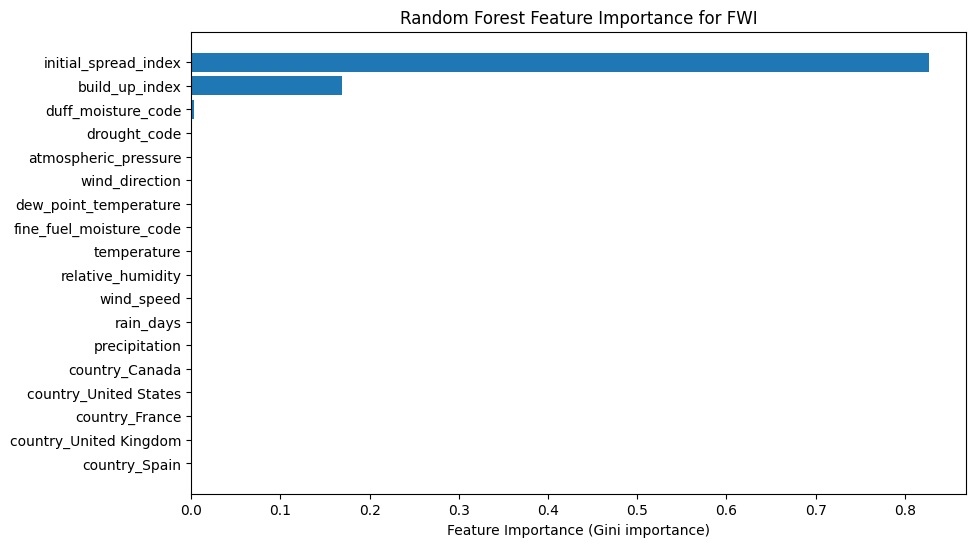

Top 10 important features:
                    Feature  Importance
12     initial_spread_index    0.827533
11           build_up_index    0.168843
9        duff_moisture_code    0.003033
10             drought_code    0.000119
5      atmospheric_pressure    0.000063
4            wind_direction    0.000062
1     dew_point_temperature    0.000060
8   fine_fuel_moisture_code    0.000058
0               temperature    0.000056
2         relative_humidity    0.000052


In [38]:

# ----------------------------
# 5. Plot Feature Importance
# ----------------------------
plt.figure(figsize=(10,6))
plt.barh(feat_importances["Feature"], feat_importances["Importance"])
plt.gca().invert_yaxis()  # highest importance at top
plt.xlabel("Feature Importance (Gini importance)")
plt.title("Random Forest Feature Importance for FWI")
plt.show()

# ----------------------------
# 6. Print top features
# ----------------------------
print("Top 10 important features:")
print(feat_importances.head(10))